In [2]:
from google.colab import files
uploaded = files.upload()


Saving PrestDigital.csv to PrestDigital.csv


In [3]:
import pandas as pd
df = pd.read_csv('PrestDigital.csv')
df.head()


,mes;cliente;estadoCliente;rngEdad;genero;rngSueldo;procedencia;operDigital;trxDigitalUm;promTrxDig3Um;recCamp;frecCamp;tenTarjeta;promConsBanco3Um;promSaldoBanco3Um;promSaldoTc3Um;promSaldoPrest3Um;sowTcUm;sowPrestUm;ventaPrestDig
0,201608;1;A;<35-45];M;<3500-4500];lima;NN;0;0;1...
1,201608;2;A;<25-35];M;<3500-4500];lima;BXI-BM;2...
2,201608;3;A;<35-45];F;<4500-6000];lima;BM;407;3...
3,201608;4;A;<25-35];F;<3500-4500];lima;NN;0;0;1...
4,201608;5;A;<35-45];F;<=1000;lima;NN;0;0;1;1;TD...


In [4]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [5]:
# Ver columnas y tipos de datos
print(df.columns)
print(df.info())

# Ver estadísticos
print(df.describe())

# Eliminar filas nulas o valores extremos si es necesario
df = df.dropna()


Index(['mes;cliente;estadoCliente;rngEdad;genero;rngSueldo;procedencia;operDigital;trxDigitalUm;promTrxDig3Um;recCamp;frecCamp;tenTarjeta;promConsBanco3Um;promSaldoBanco3Um;promSaldoTc3Um;promSaldoPrest3Um;sowTcUm;sowPrestUm;ventaPrestDig'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435083 entries, 0 to 435082
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                  Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                  --------------   ----- 
 0   mes;cliente;estadoCliente;rngEdad;genero;rngSueldo;procedencia;operDigital;trxDigitalUm;promTrxDig3Um;rec

In [7]:
import pandas as pd

# Carga del archivo con separador correcto
df = pd.read_csv('PrestDigital.csv', sep=';')

# Ver columnas disponibles
print(df.columns)

# Ver una muestra de datos
print(df.head())


Index(['mes', 'cliente', 'estadoCliente', 'rngEdad', 'genero', 'rngSueldo',
       'procedencia', 'operDigital', 'trxDigitalUm', 'promTrxDig3Um',
       'recCamp', 'frecCamp', 'tenTarjeta', 'promConsBanco3Um',
       'promSaldoBanco3Um', 'promSaldoTc3Um', 'promSaldoPrest3Um', 'sowTcUm',
       'sowPrestUm', 'ventaPrestDig'],
      dtype='object')
      mes  cliente estadoCliente  rngEdad genero    rngSueldo procedencia  \
0  201608        1             A  <35-45]      M  <3500-4500]        lima   
1  201608        2             A  <25-35]      M  <3500-4500]        lima   
2  201608        3             A  <35-45]      F  <4500-6000]        lima   
3  201608        4             A  <25-35]      F  <3500-4500]        lima   
4  201608        5             A  <35-45]      F       <=1000        lima   

  operDigital  trxDigitalUm  promTrxDig3Um  recCamp  frecCamp tenTarjeta  \
0          NN             0       0.000000        1         3      TC-TD   
1      BXI-BM           200     192.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reemplaza 'columna' por la que quieras usar (una a la vez)
X = df[['trxDigitalUm']]
y = df['ventaPrestDig']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 0.0027848611978610865
Coeficiente: [2.76171645e-05]
Intercepto: 0.0015852723029694156


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos con separador correcto
df = pd.read_csv('PrestDigital.csv', sep=';')

# Seleccionar variables predictoras y variable objetivo
X = df[['trxDigitalUm', 'promTrxDig3Um', 'promSaldoPrest3Um']]
y = df['ventaPrestDig']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Predecir
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² (coeficiente de determinación):", r2)
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 0.0027838376594631503
R² (coeficiente de determinación): 0.00441652447972074
Coeficientes: [1.54007845e-05 1.45242183e-05 2.83763836e-08]
Intercepto: 0.0014900750455086765


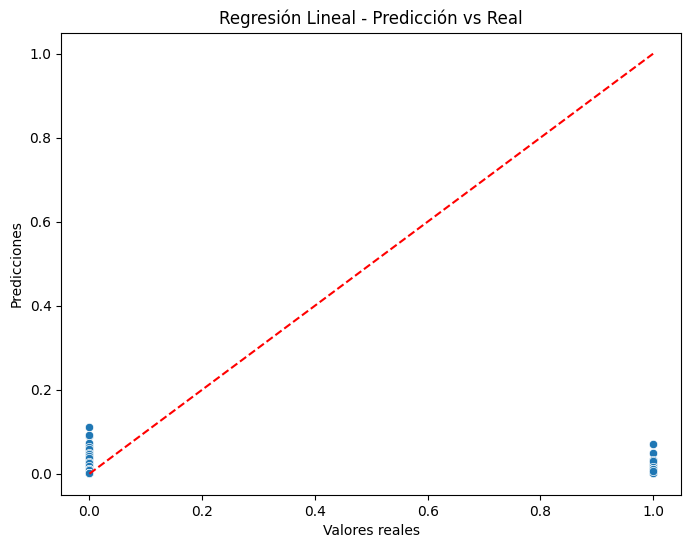

In [12]:
# Comparar valores reales vs. predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Predicción vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('PrestDigital.csv', sep=';')

# Seleccionar variables
X = df[['trxDigitalUm', 'promTrxDig3Um', 'promSaldoPrest3Um']]
y = df['ventaPrestDig']

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Crear el modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),  # 3 variables de entrada
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # salida continua (regresión)
])

# Compilar
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0043 - mae: 0.0125 - val_loss: 0.0025 - val_mae: 0.0049
Epoch 2/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0027 - mae: 0.0062 - val_loss: 0.0025 - val_mae: 0.0072
Epoch 3/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0028 - mae: 0.0066 - val_loss: 0.0025 - val_mae: 0.0049
Epoch 4/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0029 - mae: 0.0067 - val_loss: 0.0025 - val_mae: 0.0045
Epoch 5/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0028 - mae: 0.0065 - val_loss: 0.0025 - val_mae: 0.0050
Epoch 6/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0028 - mae: 0.0064 - val_loss: 0.0025 - val_mae: 0.0080
Epoch 7/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0030 - mae: 0.0070 - val_loss: 0.0025 - val_mae: 0.0127
Epoch 8/100
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0028 - mae: 0.0065 - val_loss: 0.0025 - val_mae: 0.0056
Epoch 9/100
8702/8702 ━━

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0026 - mae: 0.0054
MAE: 0.01


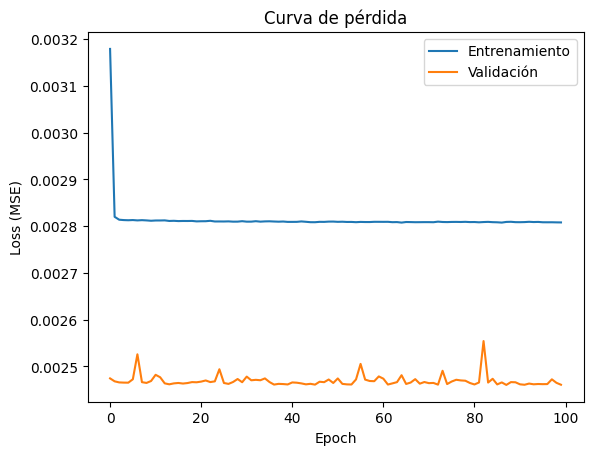

In [16]:
# Evaluación en test
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"MAE: {mae:.2f}")

# Graficar pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("Curva de pérdida")
plt.show()


2720/2720 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


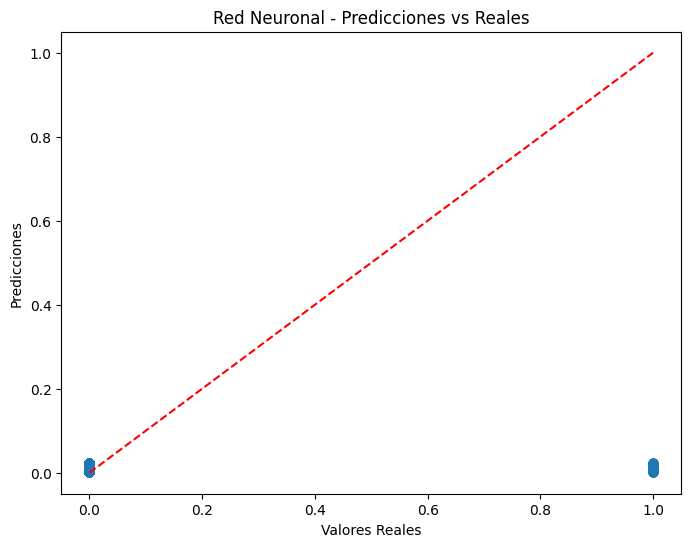

In [17]:
y_pred = model.predict(X_test_scaled)

# Graficar predicciones vs reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Red Neuronal - Predicciones vs Reales")
plt.show()


In [19]:
import csv

# Simulamos cargar los datos desde un CSV
with open('PrestDigital.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f, delimiter=';')
    data = list(reader)

# Lista para guardar grupos de clientes
clientes_altos = []
clientes_medios = []
clientes_bajos = []

# Diccionario para contadores
contador = {
    'altos': 0,
    'medios': 0,
    'bajos': 0
}

# Recorrer los datos (bucle)
for fila in data:
    # Convertir strings a floats
    try:
        venta = float(fila['ventaPrestDig'])
        trx = float(fila['trxDigitalUm'])
    except ValueError:
        continue  # saltar filas con datos inválidos

    # Clasificación con condición (if)
    if venta >= 10000:
        clientes_altos.append(trx)
        contador['altos'] += 1
    elif venta >= 5000:
        clientes_medios.append(trx)
        contador['medios'] += 1
    else:
        clientes_bajos.append(trx)
        contador['bajos'] += 1

# Mostrar resultados
print("Clientes clasificados:")
print(contador)

# Calcular y mostrar promedios (otra vez usando bucle)
promedios = {
    'altos': sum(clientes_altos) / len(clientes_altos) if clientes_altos else 0,
    'medios': sum(clientes_medios) / len(clientes_medios) if clientes_medios else 0,
    'bajos': sum(clientes_bajos) / len(clientes_bajos) if clientes_bajos else 0
}

print("\nPromedio de trxDigitalUm por grupo:")
for grupo, promedio in promedios.items():
    print(f"{grupo.capitalize()}: {promedio:.2f}")


Clientes clasificados:
{'altos': 0, 'medios': 0, 'bajos': 435083}

Promedio de trxDigitalUm por grupo:
Altos: 0.00
Medios: 0.00
Bajos: 42.60


Clientes por grupo: {'Bajo': 435083}
Promedios de trxDigitalUm por grupo: {'Bajo': 42.6019908844979}


<ipython-input-20-45e261cb68d5>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='grupo', palette='pastel', order=['Bajo', 'Medio', 'Alto'])


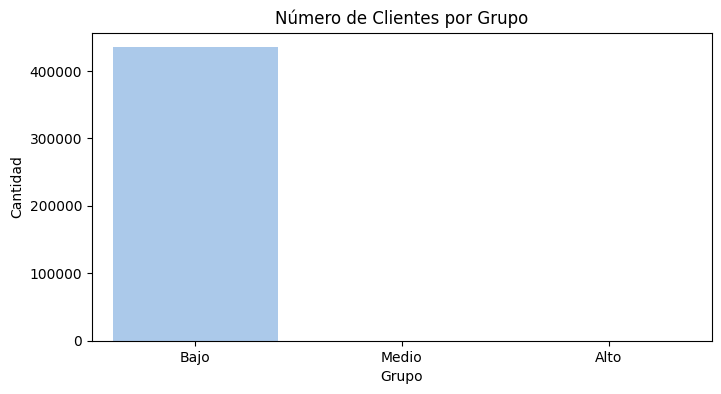

<ipython-input-20-45e261cb68d5>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(promedios.keys()), y=list(promedios.values()), palette='coolwarm')


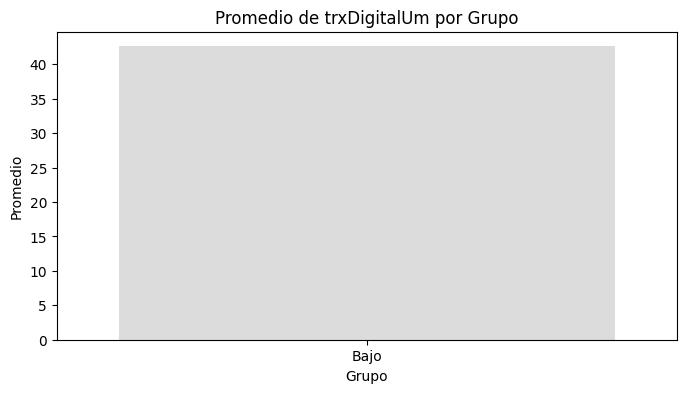

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el CSV
df = pd.read_csv('PrestDigital.csv', sep=';')

# Asegurar que las columnas sean numéricas
df['ventaPrestDig'] = pd.to_numeric(df['ventaPrestDig'], errors='coerce')
df['trxDigitalUm'] = pd.to_numeric(df['trxDigitalUm'], errors='coerce')

# Eliminar filas con valores nulos
df.dropna(subset=['ventaPrestDig', 'trxDigitalUm'], inplace=True)

# Clasificación en función de la ventaPrestDig
def clasificar_cliente(venta):
    if venta >= 10000:
        return 'Alto'
    elif venta >= 5000:
        return 'Medio'
    else:
        return 'Bajo'

# Aplicar la función
df['grupo'] = df['ventaPrestDig'].apply(clasificar_cliente)

# Contar clientes por grupo (como diccionario)
conteo = df['grupo'].value_counts().to_dict()
print("Clientes por grupo:", conteo)

# Calcular promedio de trxDigitalUm por grupo
promedios = df.groupby('grupo')['trxDigitalUm'].mean().to_dict()
print("Promedios de trxDigitalUm por grupo:", promedios)

# Visualización 1: Conteo de clientes por grupo
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='grupo', palette='pastel', order=['Bajo', 'Medio', 'Alto'])
plt.title('Número de Clientes por Grupo')
plt.ylabel('Cantidad')
plt.xlabel('Grupo')
plt.show()

# Visualización 2: Promedio de trxDigitalUm por grupo
plt.figure(figsize=(8, 4))
sns.barplot(x=list(promedios.keys()), y=list(promedios.values()), palette='coolwarm')
plt.title('Promedio de trxDigitalUm por Grupo')
plt.ylabel('Promedio')
plt.xlabel('Grupo')
plt.show()
